In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

load the clustering data

In [2]:

# Load PCA dataset
PCA_ds = pd.read_csv("clustering_data.csv")
print(PCA_ds.head())

#load the data 
df = pd.read_csv("feature_engineered_data.csv")

       col1      col2      col3
0  4.973423 -0.210704  2.476993
1 -2.889918 -0.042681 -1.525105
2  2.602719 -0.779339 -0.214330
3 -2.667869 -1.524438 -0.145515
4 -0.659392  0.221631 -0.078578


# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

clustering is a machine learning technique that groups data into clusters
now i have reduced the dataset into 3 dimension , i will be performing clustering via agglometric clustering. heriarhical clustering method is a agglometric clustering

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow method to determine the number of clusters to formed 


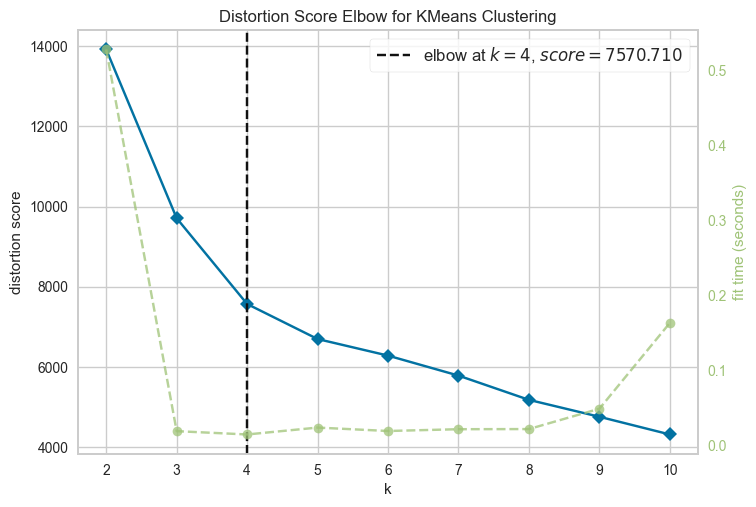

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
#elbow describe the number of clusters u want
# we using the yellow brick elbow visualizer
print("Elbow method to determine the number of clusters to formed ")
Elbow_M = KElbowVisualizer(KMeans(),k=(10)) #create a visualizer from yellow brick runs from k1 to k2
Elbow_M.fit(PCA_ds)#fit data into the visualizer 
Elbow_M.show()#show the plot 


What this plot means

The blue line shows the distortion score (inertia) — basically how far data points are from their assigned cluster centers.

As k (number of clusters) increases, the distortion score decreases (clusters fit better).

At some point, adding more clusters doesn’t improve the score much → that’s the elbow point.

👉 In my  case, the elbow is k = 4.
This means your data naturally groups best into 4 clusters.

In [4]:
#initiating the agglomerative clustering
AC = AgglomerativeClustering(n_clusters=4)# u are asking ur algorithm to divied into groups
Yhat_AC = AC.fit_predict(PCA_ds)#fit the data into the model
PCA_ds['Clusters'] = Yhat_AC#assign the new column to the data frame
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= Yhat_AC
print(Yhat_AC)

[2 3 2 ... 2 0 3]


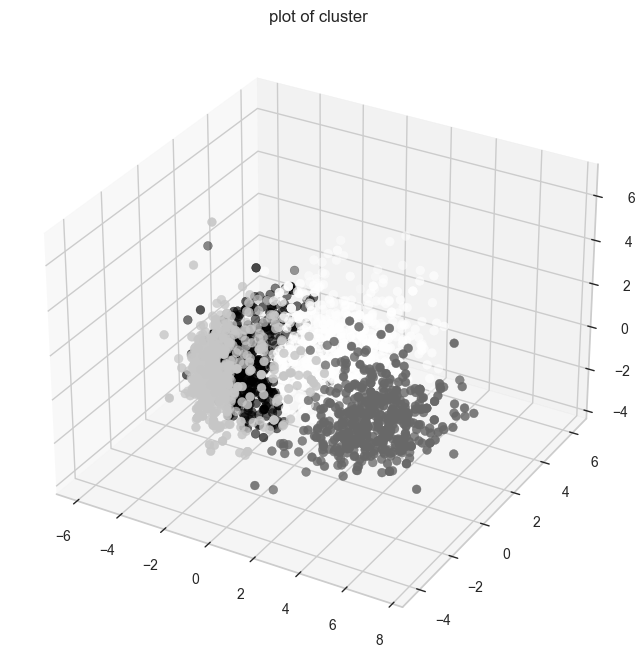

In [5]:
#visualizing the clusters
fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(111,projection = '3d',label = 'la')
ax.scatter(PCA_ds["col1"],PCA_ds["col2"],PCA_ds["col3"], s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title('plot of cluster')
plt.show()

In [6]:
# 🔹 Save cleaned dataset for evaluation
df.to_csv("evaluation_data.csv", index=False)
print("✅ Data clustering complete. Cleaned dataset saved as 'evaluation_data.csv'")

✅ Data clustering complete. Cleaned dataset saved as 'evaluation_data.csv'
